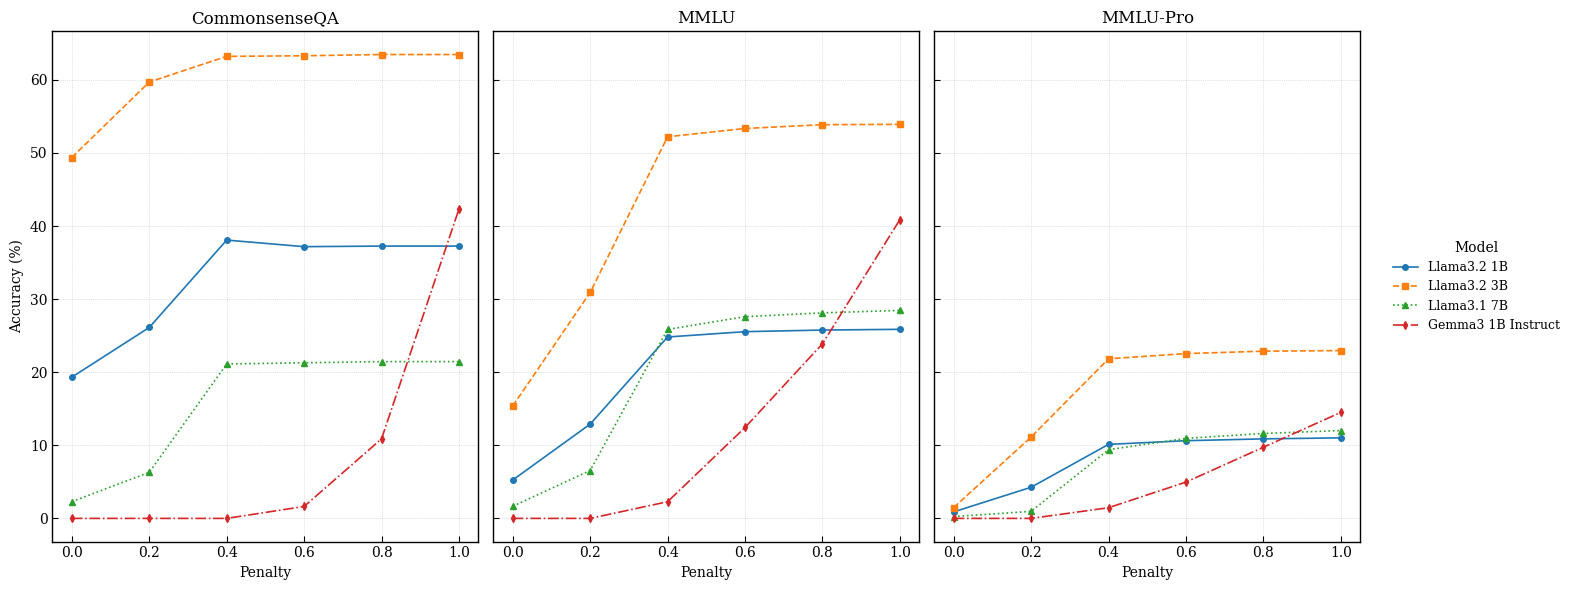

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# === Data ===
penalties = np.array([0.0, 0.2, 0.4, 0.6, 0.8, 1.0])
models = ["Llama3.2 1B", "Llama3.2 3B", "Llama3.1 7B", "Gemma3 1B Instruct"]

metrics = {
    "CommonsenseQA": np.array([
        [19.32, 26.12, 38.08, 37.18, 37.26, 37.26],
        [49.38, 59.70, 63.22, 63.30, 63.47, 63.47],
        [ 2.29,  6.30, 21.13, 21.29, 21.45, 21.45],
        [ 0.00,  0.00,  0.00,  1.63, 10.89, 42.34],
    ]),
    "MMLU": np.array([
        [ 5.25, 12.90, 24.82, 25.55, 25.77, 25.87],
        [15.38, 30.91, 52.22, 53.35, 53.87, 53.92],
        [ 1.66,  6.55, 25.85, 27.60, 28.12, 28.46],
        [ 0.00,  0.00,  2.28, 12.44, 23.90, 40.89],
    ]),
    "MMLU-Pro": np.array([
        [ 0.89,  4.26, 10.13, 10.63, 10.88, 11.02],
        [ 1.48, 11.13, 21.84, 22.55, 22.88, 22.96],
        [ 0.25,  0.96,  9.40, 10.95, 11.62, 12.02],
        [ 0.00,  0.00,  1.46,  4.97,  9.74, 14.51],
    ]),
}

# === Global Style ===
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 10,
    "axes.linewidth": 1.0,
    "axes.edgecolor": "black",
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.major.size": 4,
    "ytick.major.size": 4,
    "legend.frameon": False,
})

# === Plotting ===
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

linestyles = ["-", "--", ":", "-."]
markers     = ["o", "s", "^", "d"]
colors      = ["black"] * 4

for ax, (metric_name, data) in zip(axes, metrics.items()):
    for idx, (model, ls, mk) in enumerate(zip(models, linestyles, markers)):
        ax.plot(
            penalties, data[idx],
            linestyle=ls,
            marker=mk,
            markersize=4,
            linewidth=1.2,
            label=model
        )
    ax.set_title(metric_name, pad=6)
    ax.set_xlabel("Penalty")
    ax.grid(True, linestyle=":", linewidth=0.5, alpha=0.7)

axes[0].set_ylabel("Accuracy (%)")
axes[-1].legend(
    loc="center left",
    bbox_to_anchor=(1.05, 0.5),
    title="Model",
    fontsize=9,
    title_fontsize=10
)

fig.tight_layout(rect=[0, 0, 0.88, 1])
plt.show()



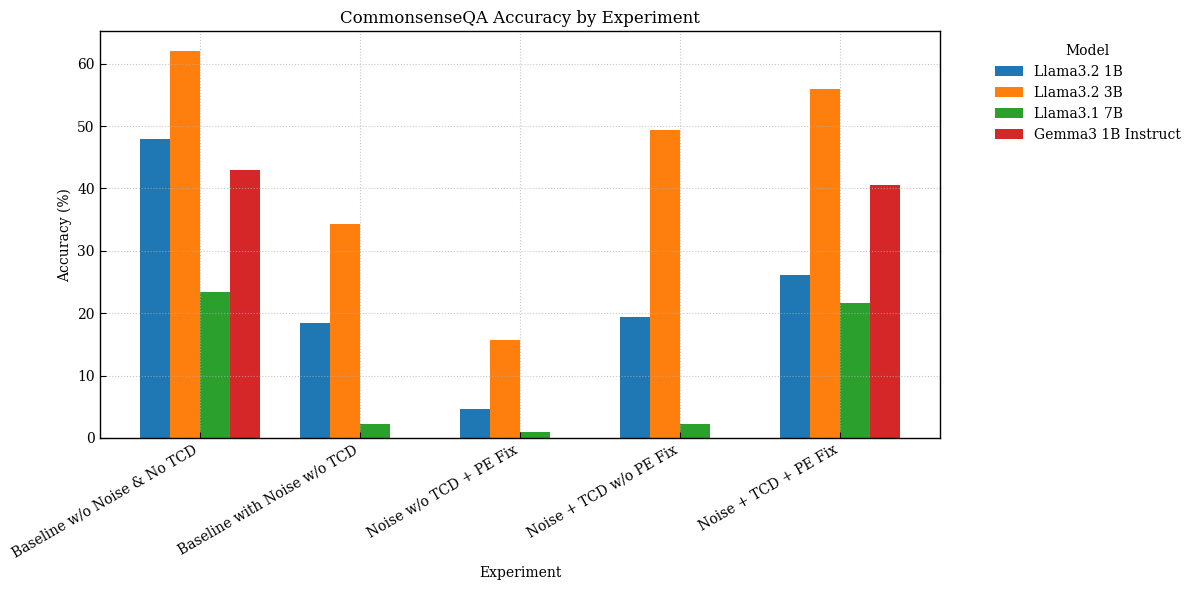

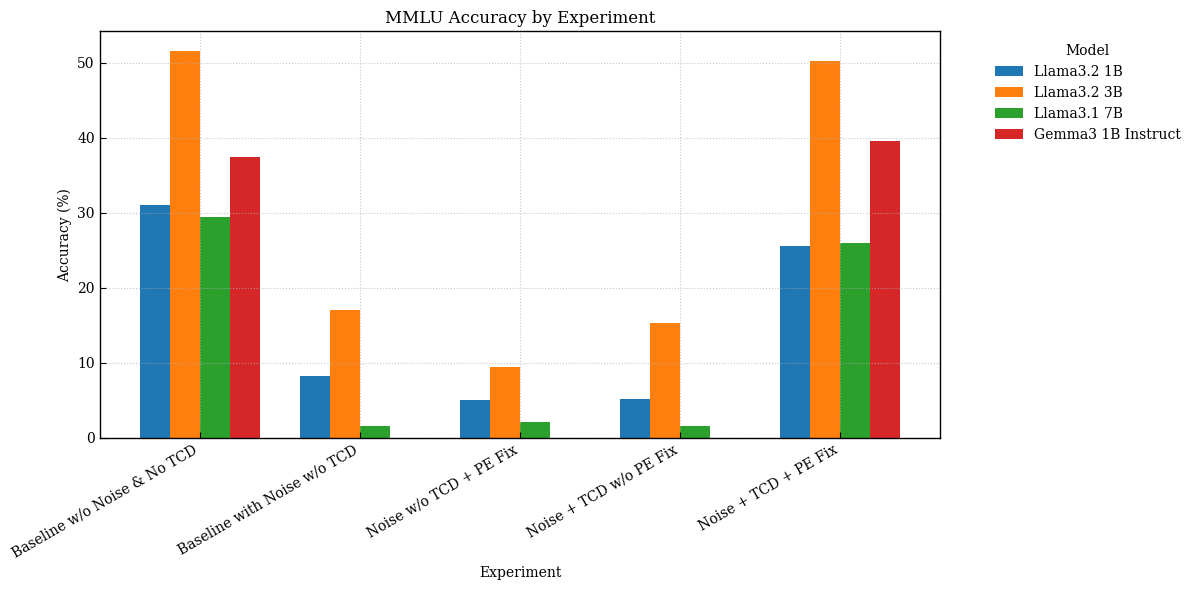

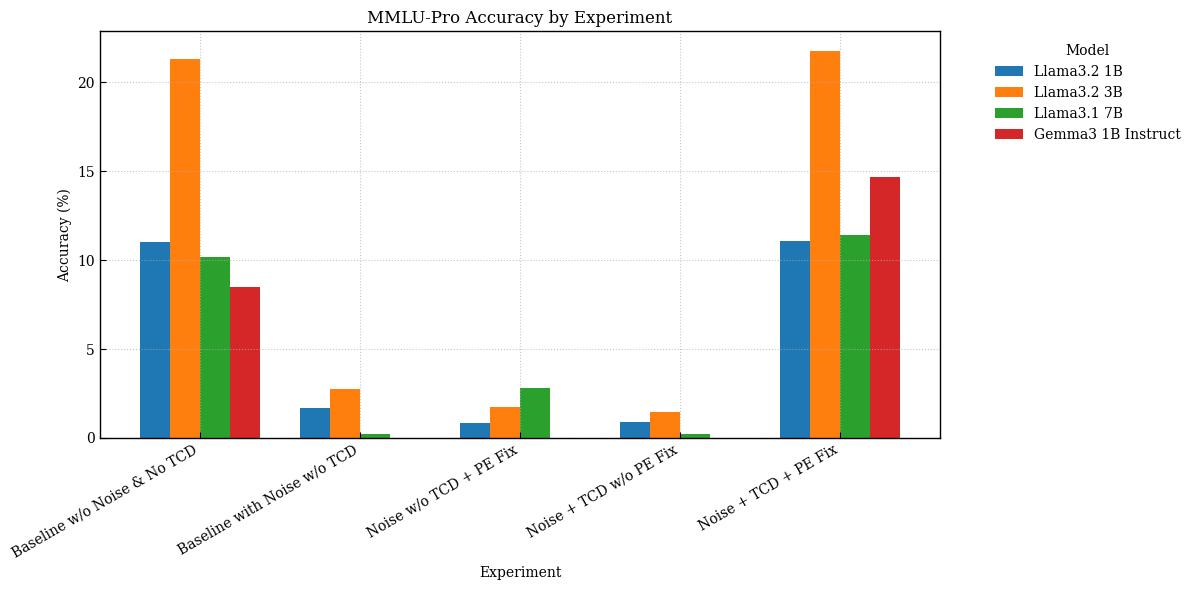

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# === Data ===
experiments = [
    "Baseline w/o Noise & No TCD",
    "Baseline with Noise w/o TCD",
    "Noise w/o TCD + PE Fix",
    "Noise + TCD w/o PE Fix",
    "Noise + TCD + PE Fix"
]

models = ["Llama3.2 1B", "Llama3.2 3B", "Llama3.1 7B", "Gemma3 1B Instruct"]

# Accuracy values (percent)
data = {
    "CommonsenseQA": [
        [47.99, 62.08, 23.34, 42.99],  # Baseline w/o Noise & No TCD
        [18.50, 34.31,  2.29,  0.00],  # Baseline with Noise w/o TCD
        [ 4.58, 15.64,  0.98,  0.00],  # Noise w/o TCD + PE Fix
        [19.32, 49.38,  2.29,  0.00],  # Noise + TCD w/o PE Fix
        [26.12, 56.01, 21.70, 40.54],  # Noise + TCD + PE Fix
    ],
    "MMLU": [
        [31.09, 51.61, 29.46, 37.50],
        [ 8.28, 17.02,  1.66,  0.00],
        [ 5.04,  9.48,  2.10,  0.00],
        [ 5.25, 15.38,  1.66,  0.00],
        [25.54, 50.29, 26.02, 39.52],
    ],
    "MMLU-Pro": [
        [10.99, 21.31, 10.17,  8.46],
        [ 1.67,  2.74,  0.25,  0.00],
        [ 0.83,  1.76,  2.82,  0.00],
        [ 0.89,  1.48,  0.25,  0.00],
        [11.06, 21.77, 11.41, 14.69],
    ],
}

# === Plot ===
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 10,
    "axes.grid": True,
    "grid.linestyle": ":",
    "grid.alpha": 0.7,
})

for metric, matrix in data.items():
    df = pd.DataFrame(matrix, index=experiments, columns=models)
    ax = df.plot(
        kind="bar",
        figsize=(12, 6),
        width=0.75
    )
    ax.set_title(f"{metric} Accuracy by Experiment")
    ax.set_ylabel("Accuracy (%)")
    ax.set_xlabel("Experiment")
    ax.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()
